# Problem 1

2-11  A water molecule fixed in an inorganic salt crystal loses approximately 10 cal mol $^{−1}$ K $^{−1}$ of entropy compared to a water molecule in solution. Assuming this to be an approximate maximum value, by how much can $K_d$ change and in which direction at 25°C when an additional water molecule is fixed in a protein-ligand complex?

$\Delta S = -10 cal mol^{-1} K^{-1}, and \Delta H = 0$ 

$\implies \Delta G = 0 - T\Delta S = - (25 \degree C + 273.15) \degree K \times -10 cal mol^{-1} K^{-1} = 2981.5 cal mol^{-1}$

$\Delta G = RTln(K_d) \implies 2981.5 cal mol^{-1} = 1.987 cal mol^{-1} K^{-1} \times (298.15 \degree K) ln(K_d)$ 

$\frac{2981.5 cal mol^{-1}}{592.48cal mol^{-1}} = ln{K_d} \implies K_d = e^5 = 148.4$

# Problem 2

2-20  You wish to study the interaction between a protein and a ligand, and you have developed a special technique, with which you can directly detect the number of complexes in solution. You start with a solution that initially contains 1,000 nM protein and 1,000 nM ligand, and you wait until equilibrium is reached. At 37°C, the concentration of complexes at equilibrium is 729.8 nM; at 25°C, this concentration is 758.2 nM; and at 20°C, this concentration is 763.8 nM. a. What are the $K_d$ values for this interaction at 37°C, 25°C, and 20°C? b. Given the result in part a and without invoking additional assumptions, calculate $\Delta$ H° at 30°C.

(a)

$K_d = \frac{[P][L]}{[PL]}$

At equilibrium 
- $[P] = [P]_0 - [PL] = 1000 - [PL]$
- $[L] = [L]_0 - [PL] = 1000 - [PL]$

$\implies K_d = \frac{( 1000 - [PL])( 1000 - [PL])}{[PL]} = \frac{( 1000 - [PL])^2}{[PL]}$

- At $37 \degree C$

    $K_d = \frac{(1000-729.6)^2}{729.8} = 100.04nM$

- At $25 \degree C$

    $K_d = \frac{(1000-758.2)^2}{758.2} = 77.11nM$

- At $20 \degree C$

    $K_d = \frac{(1000-763.8)^2}{763.8} = 73.04nM$

(b)

$RTln(K_d) = \Delta H - T \Delta S$

$ln(K_d) = \frac{\Delta H}{RT} - \frac{\Delta S}{R}$



In [ ]:
import numpy as np

# Given data
T_C = np.array([37, 25, 20])              # Celsius
T_K = T_C + 273.15                        # Kelvin
Kd_nM = np.array([100.04, 77.11, 73.04])  # nM (from part A -- see above)

x = 1 / T_K                 # 1/T
y = np.log(Kd_nM)           # ln(Kd)

# Linear fit: ln(Kd) = (ΔH/R)(1/T) - ΔS/R
slope, intercept = np.polyfit(x, y, 1)

# Constants
R = 1.987  # cal/mol/K

# Thermodynamic parameters
delta_H = slope * R         # cal/mol
delta_H_kcal = delta_H / 1000

print(f'ΔH: {delta_H_kcal:.2f} kcal/mol')


ΔH: -3.45 kcal/mol


# Problem 3. 

What would be the absorbance at 280 nm of 200 μL of a 2.0 mg/mL solution of human TNF $\alpha$? Assume that the absorbance is measured in a standard 96-well microtiter plate. (hint: you will have to calculate the pathlength).

$A = log_{10} \frac{l_0}{l_t} = \epsilon [C]l$

$l = Volume / Area = \frac{0.200 cm^3}{0.32 cm^2} = 0.625 cm$

- [Area](https://www.thermofisher.com/us/en/home/references/gibco-cell-culture-basics/cell-culture-protocols/cell-culture-useful-numbers.html#:~:text=167008-,0.32,-0.01%20x%2010)
- [$\epsilon_{280}$](https://www.prospecbio.com/tnf-alpha_mouse#:~:text=10%2C000%2C000%20Units/mg.-,PROTEIN%20CONTENT,-Protein%20quantitation%20was)

$\implies A = \epsilon [C]l = 1.25 mL mg^{-1} cm^{-1} \times 2.0 mg mL^{-1} \times 0.625 cm = 1.5625$



# Problem 4. 
In class we solved for steady state expression of GFP in yeast populations when induced. We found that even at 10 hours under the given expression conditions the samples did not reach steady state. Use the same kinetic parameters (k1, k2, k3) for expression in bacteria with a specific growth rate of 1.1 $h^{-1}$.  

## Problem 4 a. 

Determine the time required to reach steady state (97.5% of the steady state value of active GFP). Using normalized local objective sensitivity, which of the three kinetic parameters (k1, k2, k3) contributes most to the time required to reach steady state? 

Steady state GFP concentration: 13.2441 nM/gDCW

Time to reach 97.5% of steady state: 276.99 minutes (4.62 hours)


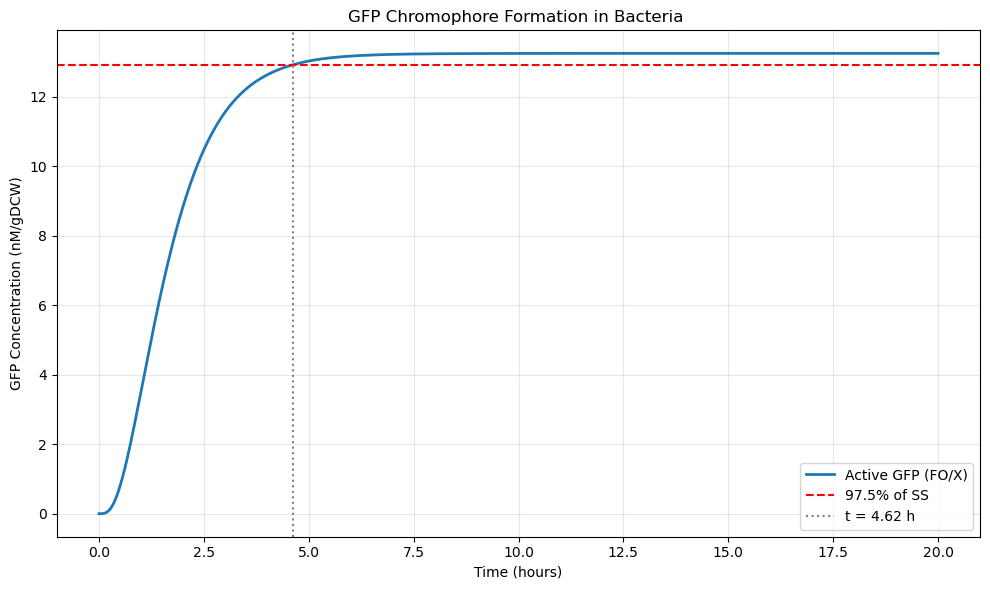

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def chromophore_bacteria(t, y, k1, k2, k3, growth_rate):
    """
    GFP chromophore formation model for bacteria
    
    Parameters:
    - t: time
    - y: state vector [U/X, F/X, FC/X, FO/X]
    - k1, k2, k3: kinetic rate constants (1/min)
    - growth_rate: specific growth rate (1/min)
    
    Returns:
    - dydt: derivative vector
    """
    dydt = np.zeros(4)
    dydt[0] = 1 - (k1 + growth_rate)*y[0]        # U/X  in nM/gDCW - Unfolded
    dydt[1] = k1*y[0] - (k2 + growth_rate)*y[1]  # F/X  in nM/gDCW - Folded
    dydt[2] = k2*y[1] - (k3 + growth_rate)*y[2]  # FC/X in nM/gDCW - Cyclized
    dydt[3] = k3*y[2] - growth_rate*y[3]         # FO/X in nM/gDCW - Oxidized
    return dydt

# Given parameters
k1 = 0.069  
k2 = 0.231  
k3 = 0.0091 
growth_rate_bacteria = 1.1 / 60  # Convert to 1/min

# Initial conditions
y0 = [0, 0, 0, 0]

# Time span - simulate for sufficient time
t_span = (0, 1200)  # 0 to 1200 minutes (20 hours)
t_eval = np.linspace(0, 1200, 10000)

# Solve the ODE system
sol = solve_ivp(
    lambda t, y: chromophore_bacteria(t, y, k1, k2, k3, growth_rate_bacteria),
    t_span,
    y0,
    t_eval=t_eval,
    method='LSODA'
)

# Extract the active GFP concentration (FO/X)
FO = sol.y[3, :]
time_min = sol.t

# Calculate steady state value (value at end of simulation)
FO_ss = FO[-1]
print(f"Steady state GFP concentration: {FO_ss:.4f} nM/gDCW")

# Find time to reach 97.5% of steady state
target = 0.975 * FO_ss
idx = np.where(FO >= target)[0]
if len(idx) > 0:
    time_to_ss = time_min[idx[0]]
    print(f"\nTime to reach 97.5% of steady state: {time_to_ss:.2f} minutes ({time_to_ss/60:.2f} hours)")
else:
    print("Steady state not reached in simulation time")
    time_to_ss = None

# Plot the GFP formation over time
plt.figure(figsize=(10, 6))
plt.plot(time_min/60, FO, linewidth=2, label='Active GFP (FO/X)')
plt.axhline(y=target, linestyle='--', label='97.5% of SS', color = 'red')
if time_to_ss is not None:
    plt.axvline(x=time_to_ss/60, linestyle=':', label=f't = {time_to_ss/60:.2f} h', color = 'gray')
plt.xlabel('Time (hours)')
plt.ylabel('GFP Concentration (nM/gDCW)')
plt.title('GFP Chromophore Formation in Bacteria ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
def compute_time_to_ss(k1, k2, k3):

    sol = solve_ivp(
        lambda t, y: chromophore_bacteria(
            t, y, k1, k2, k3, growth_rate_bacteria
        ),
        t_span,
        y0,
        t_eval=t_eval,
        method='LSODA'
    )

    FO = sol.y[3, :]
    FO_ss = FO[-1]

    target = 0.975 * FO_ss

    idx = np.where(FO >= target)[0]

    if len(idx) == 0:
        return None

    return sol.t[idx[0]]

# baseline output
Y_base = compute_time_to_ss(k1, k2, k3)

delta = 0.10   # 10% total perturbation

def normalized_sensitivity(param):

    if param == "k1":
        k_plus  = k1 * (1 + delta/2)
        k_minus = k1 * (1 - delta/2)

        Y_plus  = compute_time_to_ss(k_plus, k2, k3)
        Y_minus = compute_time_to_ss(k_minus, k2, k3)

        return (Y_plus - Y_minus) / (delta * Y_base)

    elif param == "k2":
        k_plus  = k2 * (1 + delta/2)
        k_minus = k2 * (1 - delta/2)

        Y_plus  = compute_time_to_ss(k1, k_plus, k3)
        Y_minus = compute_time_to_ss(k1, k_minus, k3)

        return (Y_plus - Y_minus) / (delta * Y_base)

    elif param == "k3":
        k_plus  = k3 * (1 + delta/2)
        k_minus = k3 * (1 - delta/2)

        Y_plus  = compute_time_to_ss(k1, k2, k_plus)
        Y_minus = compute_time_to_ss(k1, k2, k_minus)

        return (Y_plus - Y_minus) / (delta * Y_base)


S_k1 = normalized_sensitivity("k1")
S_k2 = normalized_sensitivity("k2")
S_k3 = normalized_sensitivity("k3")

print("\nNormalized sensitivities:")
print("S(Y;k1) =", f'{S_k1:.4f}')
print("S(Y;k2) =", f'{S_k2:.4f}')
print("S(Y;k3) =", f'{S_k3:.4f}')


# determine dominant parameter 
sensitivities = {
    "k1": np.abs(S_k1),
    "k2": np.abs(S_k2),
    "k3": np.abs(S_k3)
}

most_sensitive = max(sensitivities, key=sensitivities.get)

print("\nParameter contributing most to time-to-steady-state:", most_sensitive)



Normalized sensitivities:
S(Y;k1) = -0.0130
S(Y;k2) = -0.0693
S(Y;k3) = -0.0997

Parameter contributing most to time-to-steady-state: k3


## Problem 4 b. 

You should find that the oxidation rate (k3) is the most important determinant for the time to reach steady state (I’m giving you the answer but you must show this in part a!). It turns out that extensive protein engineering on GFP was performed over the past two decades to increase the oxidation rate k3. The fastest maturing GFP variant with respect to k3 is “GFPm”. Determine the time needed to reach steady state for the GFPm variant & also for a theoretical variant with an infinitely fast k3.   

In [55]:
# Example values
k3_GFPm = 0.05  # 1/min (fastest GFP variant)
k3_inf = 1e6    # practically instantaneous

# Time to steady state for GFPm
time_to_ss_GFPm = compute_time_to_ss(k1, k2, k3_GFPm)
print(f"Time to 97.5% SS for GFPm (k3={k3_GFPm} 1/min): {time_to_ss_GFPm:.2f} min ({time_to_ss_GFPm/60:.2f} h)")

# Time to steady state for theoretical infinitely fast k3
time_to_ss_inf = compute_time_to_ss(k1, k2, k3_inf)
print(f"Time to 97.5% SS for theoretical infinite k3: {time_to_ss_inf:.2f} min ({time_to_ss_inf/60:.2f} h)")


Time to 97.5% SS for GFPm (k3=0.05 1/min): 236.90 min (3.95 h)
Time to 97.5% SS for theoretical infinite k3: 218.30 min (3.64 h)


## Problem 4 c. 
As discussed in lecture, comparatively fast steady state values can be reached if you add a C-terminal ssra tag to your protein (see reference below). Describe qualitatively and quantitatively how the ssra tag functions, and how it impacts the time to reach steady state if appended to GFP. Does the overall amount of GFP at steady state increase, decrease, or stay the same? 

Qualitative: The ssrA tag is recognized by specific proteases (ClpXP and ClpAP), which use ATP to unfold and degrade the tagged protein.

Quantitative: The ssrA tag adds a degradation term to the GFP dynamics, reducing time to steady state from 4.6 hours to ~2.6 hours but decreasing steady-state GFP concentration by 92-99% due to the additional loss pathway beyond growth dilution.

# Location of Jupyter Notebook

This file was created in jupyter notebook, rendered into `.html` through `jupyter nbconvert --to html PS4/PS4.ipynb` then the `.html` file was saved as a `.pdf`. The location of all said files are [github.com/caterer-z-t/CHEN_5150/PS4](https://github.com/caterer-z-t/CHEN_5150/tree/main/PS4)

Please contact [ztcaterer@colorado.edu](mailto:ztcaterer@colorado.edu) if there are any issues or concerns. 

Thanks :-)